### Import Libraries

In [140]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns


# 1. DO MOVIES INFLUENCE BABY NAMES? IF SO, HOW?

In [141]:
all_characters_rank_stats = pd.read_excel('../data/Key Statistics Heroes Villains.xlsx', sheet_name = 'All')
all_characters_rank_stats.head(5)

,Year,Movie,Rating,Name,Rank in year before release,Rank in year of release,Rank in year after release,Pc change year before to year of release,Pc change year of to year after release,Mean rank 3 years before release,Mean rank 3 years after release,Pc change mean rank before to mean rank after
0,2009,The Princess and the Frog,7.1,TIANA,241,286,235,-18.67,17.83,258.67,238.00,7.990876
1,2009,Up,7.9,RUSSELL,658,667,854,-1.37,-28.04,646.00,857.33,-32.713622
2,2009,Coraline,7.8,CORALINE,5877,5877,5877,0.00,0.00,5877.00,4642.00,21.014123
3,2011,The Legend of Llorona,7.7,LEO,36,27,20,25.00,19.44,38.67,17.67,54.305663
4,2011,Soul Surfer,7.1,ALANA,208,224,210,-7.69,6.73,230.00,200.33,12.900000


In [148]:
girls_rank_df = pd.read_csv('../data/girls_rank_clean.csv', index_col=[0])
girls_rank_df_t = girls_rank_df.transpose()
girls_rank_df_t.columns = girls_rank_df_t.iloc[0]
girls_rank_df_t.drop(girls_rank_df_t.head(1).index,inplace=True)

In [174]:

def girl_plot(name):
    year_list = []
    for i in range(21):
        year = 2020 - i
        year_list.append(str(year))
    fig, ax = plt.subplots(figsize=(15,10))    
    plt.plot(year_list, girls_rank_df_t[name], label = name, linewidth = 7, color='pink')
    cfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}
    plt.legend(loc="lower left")
    plt.title("\n"+name+"'s Rank over the past 20 years\n", fontsize = 30, **hfont)
    plt.xlabel('\nYear', fontsize=20, **hfont)
    plt.ylabel('Rank\n', fontsize=20, **hfont)
    plt.xticks(fontsize=15, rotation = 70, **cfont)
    plt.yticks(fontsize=15, **cfont)
    ax.legend(fontsize=15)
    plt.gca().invert_yaxis()
    plt.xlim([20, 0])
    plt.ylim([max(girls_rank_df_t[name])+5, 0])
    plt.show()


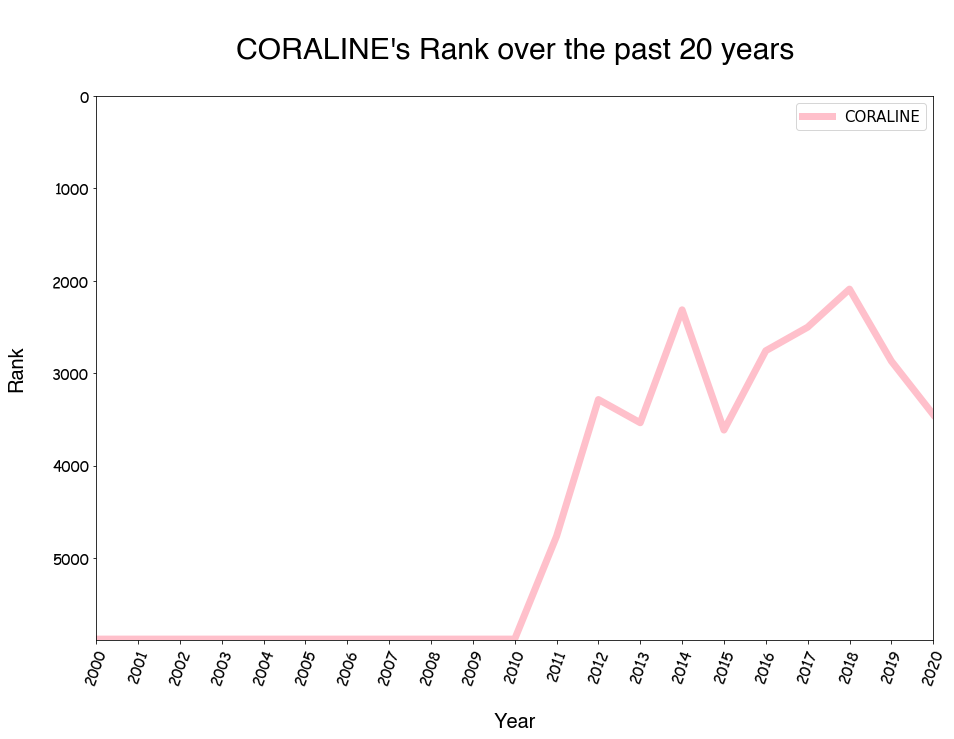

In [175]:
girl_plot('CORALINE')

It is clear that movies DO influence baby names in some way. Prior to Coraline's release in 2009, no babies in the UK were given the name Coraline. However, in 2012 babies started to be called Coraline and the popularity has fluctuated ever since.

Similarly, even though it is not a movie, Game of Thrones had it's influence on baby names as Khaleesi was used for the first time in the UK in 2010, after the release of the series. 

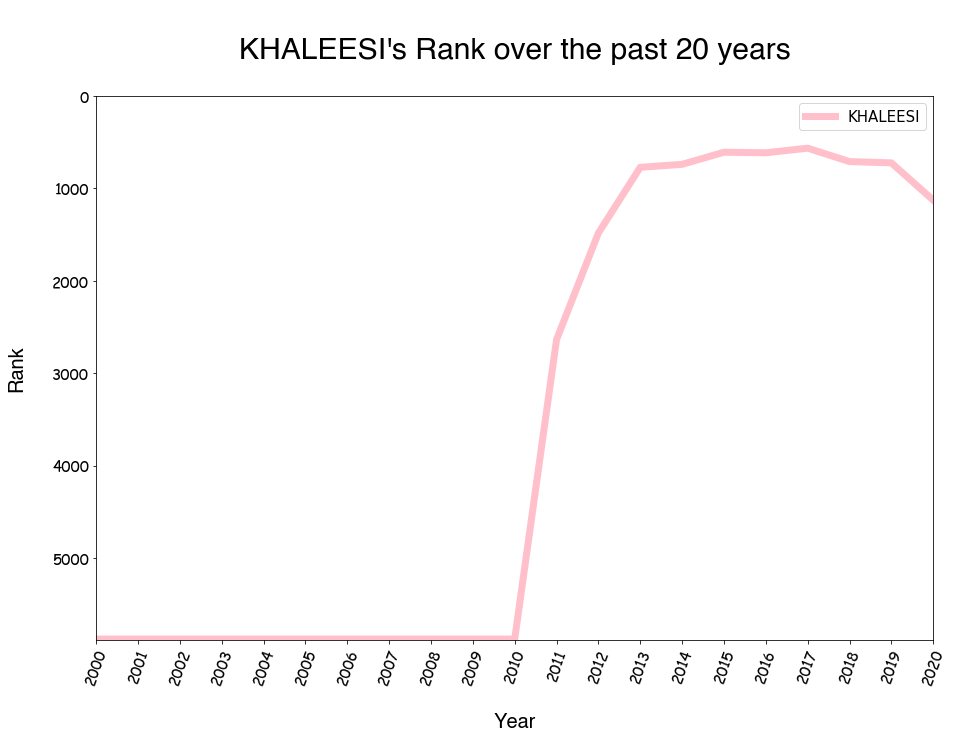

In [176]:
girl_plot('KHALEESI')

# 2. WHICH MOVIES HELD MORE INFLUENCE ON BABY NAMES?

In [142]:
#Lets look at ALL the characters to see which movies held the most influence
all_characters_rank_stats = pd.read_excel('../data/Key Statistics Heroes Villains.xlsx', sheet_name = 'All')
all_characters_rank_stats.head(5)

,Year,Movie,Rating,Name,Rank in year before release,Rank in year of release,Rank in year after release,Pc change year before to year of release,Pc change year of to year after release,Mean rank 3 years before release,Mean rank 3 years after release,Pc change mean rank before to mean rank after
0,2009,The Princess and the Frog,7.1,TIANA,241,286,235,-18.67,17.83,258.67,238.00,7.990876
1,2009,Up,7.9,RUSSELL,658,667,854,-1.37,-28.04,646.00,857.33,-32.713622
2,2009,Coraline,7.8,CORALINE,5877,5877,5877,0.00,0.00,5877.00,4642.00,21.014123
3,2011,The Legend of Llorona,7.7,LEO,36,27,20,25.00,19.44,38.67,17.67,54.305663
4,2011,Soul Surfer,7.1,ALANA,208,224,210,-7.69,6.73,230.00,200.33,12.900000


In [179]:
##Lets look at the percentage change in the mean rank before and mean rank after
most_influence_df = all_characters_rank_stats.sort_values(by=['Pc change mean rank before to mean rank after'], ascending=False)
most_influence_df[['Movie', 'Name', 'Year', 'Mean rank 3 years before release', 'Mean rank 3 years after release',
       'Pc change mean rank before to mean rank after']].head(10)

,Movie,Name,Year,Mean rank 3 years before release,Mean rank 3 years after release,Pc change mean rank before to mean rank after
9,Inside Out,RILEY,2015,965.33,277.00,71.305150
3,The Legend of Llorona,LEO,2011,38.67,17.67,54.305663
12,Hotel Transylvania,MAVIS,2015,4480.00,2165.33,51.666741
2,Coraline,CORALINE,2009,5877.00,4642.00,21.014123
7,Monsters University,MIKE,2013,1824.00,1451.33,20.431469
6,Frozen,ELSA,2013,194.33,154.67,20.408583
10,Inside Out,JOY,2015,722.33,581.00,19.565849
15,Coco,MIGUEL,2017,635.67,551.00,13.319804
4,Soul Surfer,ALANA,2011,230.00,200.33,12.900000
5,Barbie: Princess Charm School,BLAIR,2011,5255.33,4765.67,9.317398


So here, you can see, that the name which became most popular after a film release was RILEY, who is actually a girl in Inside Out. It increased by a massive 71% in rank popularity after the release of the film. Another name that was popular from Inside Out was Joy, which is 7th on the list and rose in popularity by 20%.

# 3. DO MOVIE RATINGS AFFECT THE USAGE OF CHARACTERS’ NAMES?

In [144]:
ratings_df = all_characters_rank_stats.sort_values(by=['Rating'], ascending=False)
ratings_df[['Movie', 'Name', 'Rating', 'Rank in year of release', 'Rank in year after release', 'Pc change year of to year after release']].head(5)

,Movie,Name,Rating,Rank in year of release,Rank in year after release,Pc change year of to year after release
21,Coco,ERNESTO,8.2,2512,4749,-89.05
15,Coco,MIGUEL,8.2,537,549,-2.23
16,Gifted,MARY,8.1,320,259,19.06
9,Inside Out,RILEY,7.9,539,301,44.16
10,Inside Out,JOY,7.9,666,594,10.81


In [177]:
ratings_df_2 = all_characters_rank_stats[['Movie', 'Rating', 'Name',
       'Rank in year of release', 'Rank in year after release',
       'Pc change year of to year after release',
       'Pc change mean rank before to mean rank after']]
ratings_df_2.head(5)

,Movie,Rating,Name,Rank in year of release,Rank in year after release,Pc change year of to year after release,Pc change mean rank before to mean rank after
0,The Princess and the Frog,7.1,TIANA,286,235,17.83,7.990876
1,Up,7.9,RUSSELL,667,854,-28.04,-32.713622
2,Coraline,7.8,CORALINE,5877,5877,0.00,21.014123
3,The Legend of Llorona,7.7,LEO,27,20,19.44,54.305663
4,Soul Surfer,7.1,ALANA,224,210,6.73,12.900000


<AxesSubplot:>

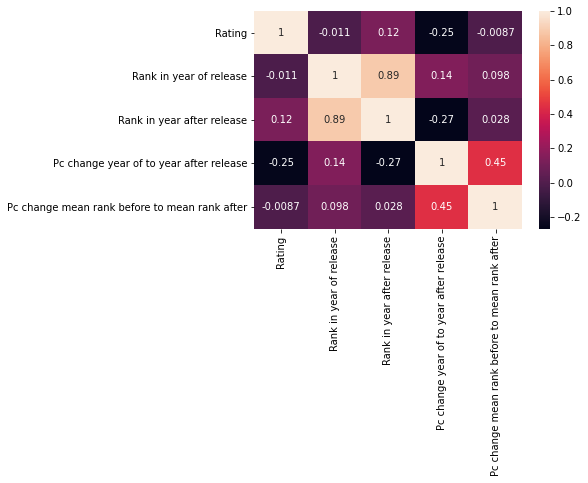

In [146]:
sns.heatmap(ratings_df_2.corr(), annot=True)

All the values in the row/column for 'Rating' are very close to 0. What this shows is that there is NOT a correlation between rating and the ranking of character names in the baby names data. 

# 4. IF THERE IS A TREND BETWEEN MOVIES AND BABY NAMES, HOW LONG DOES THE TREND LAST?

This is different for every name. We saw on a few occasions where a name would become popular straight after a movie release, and then drop off. Almost as if people were aware of how popular it was becoming so steered clear from calling their children those names. 

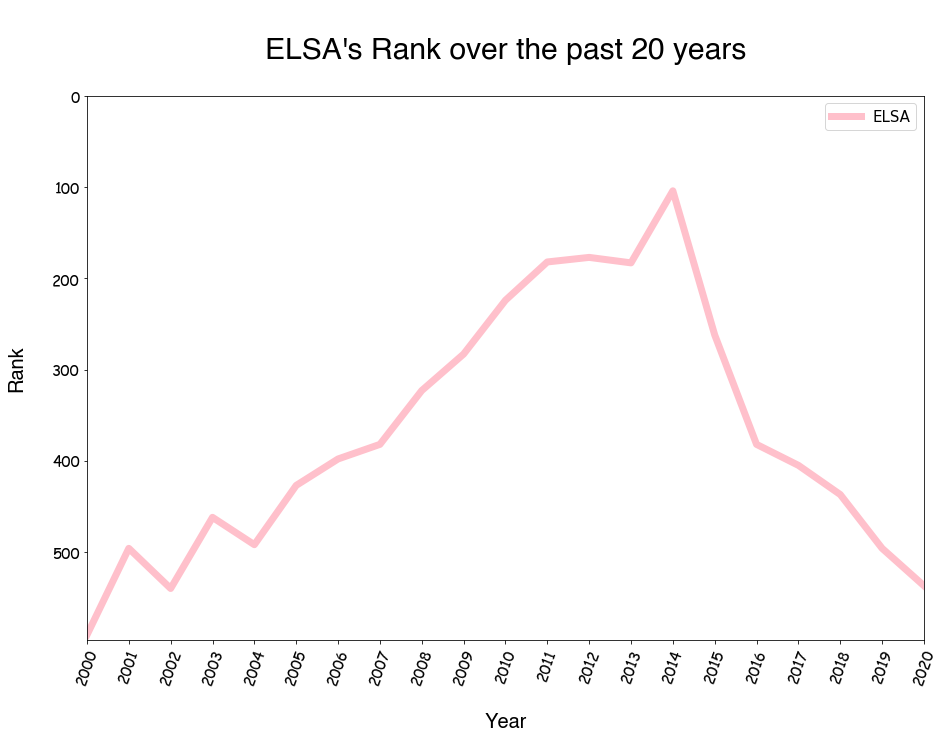

In [178]:
girl_plot('ELSA')

# 5. ARE MORE BABIES NAMED AFTER HEROES/HEROINES THAN VILLAINS?

In [159]:
#Import the heroes tab from EXCEL file
heroes_rank_stats = pd.read_excel('../data/Key Statistics Heroes Villains.xlsx', sheet_name = 'Heroes')
heroes_rank_stats.head(5)

,Year,Movie,Rating,Name,Rank in year before release,Rank in year of release,Rank in year after release,Pc change year before to year of release,Pc change year of to year after release,Mean rank 3 years before release,Mean rank 3 years after release,Pc change mean rank before to mean rank after,Unnamed: 12,Unnamed: 13
0,2009,The Princess and the Frog,7.1,TIANA,241,286,235,-18.67,17.83,258.67,238.00,7.990876,NaN,NaN
1,2009,Up,7.9,RUSSELL,658,667,854,-1.37,-28.04,646.00,857.33,-32.713622,NaN,NaN
2,2009,Coraline,7.8,CORALINE,5877,5877,5877,0.00,0.00,5877.00,4642.00,21.014123,NaN,NaN
3,2011,The Legend of Llorona,7.7,LEO,36,27,20,25.00,19.44,38.67,17.67,54.305663,NaN,NaN
4,2011,Soul Surfer,7.1,ALANA,208,224,210,-7.69,6.73,230.00,200.33,12.900000,NaN,NaN


In [160]:
#Drop the empty columns
heroes_rank_stats.drop(heroes_rank_stats.columns[12:14], axis=1, inplace=True)

In [161]:
heroes_rank_stats.describe()

,Year,Rating,Rank in year before release,Rank in year of release,Rank in year after release,Pc change year before to year of release,Pc change year of to year after release,Mean rank 3 years before release,Mean rank 3 years after release,Pc change mean rank before to mean rank after
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,2013.235294,7.447059,1147.000000,1200.117647,1020.941176,-3.461176,12.710588,1313.646471,1006.901176,10.609497
std,2.818009,0.470528,1680.630276,1864.774078,1579.559213,21.745527,19.860144,1922.901840,1497.674664,32.544194
min,2009.000000,6.800000,14.000000,15.000000,16.000000,-44.190000,-28.040000,13.000000,15.330000,-65.466448
25%,2011.000000,7.100000,208.000000,224.000000,210.000000,-18.290000,2.860000,230.000000,200.330000,1.689978
50%,2013.000000,7.400000,526.000000,537.000000,350.000000,-3.390000,10.810000,552.670000,347.330000,12.900000
75%,2015.000000,7.900000,763.000000,667.000000,854.000000,10.000000,19.060000,965.330000,857.330000,20.431469
max,2017.000000,8.200000,5877.000000,5877.000000,5877.000000,29.360000,52.440000,5877.000000,4765.670000,71.305150


In [162]:
#Read the Villains tab of the Excel file
villains_rank_stats = pd.read_excel('../data/Key Statistics Heroes Villains.xlsx', sheet_name = 'Villains')
villains_rank_stats

,Year,Movie,Rating,Name,Rank in year before release,Rank in year of release,Rank in year after release,Pc change year before to year of release,Pc change year of to year after release,Mean rank 3 years before release,Mean rank 3 years after release,Pc change mean rank before to mean rank after,Unnamed: 12
0,2013,Frozen,7.3,HANS,3987,4685,1819,-17.51,61.17,3180.33,3497.00,-9.957143,NaN
1,2013,Monsters University,7.0,RANDALL,4813,4813,4813,0.00,0.00,4768.00,4813.00,-0.943792,NaN
2,2015,Hotel Transylvania,6.8,SAMUEL,21,23,24,-9.52,-4.35,18.67,28.67,-53.561864,NaN
3,2017,A Dog's Purpose,7.6,TODD,1187,1178,1194,0.76,-1.36,1264.33,1256.33,0.632746,NaN
4,2017,Coco,8.2,ERNESTO,2556,2512,4749,1.72,-89.05,2602.67,3449.67,-32.543503,NaN


In [163]:
#Drop empty column
villains_rank_stats.drop(villains_rank_stats.columns[12], axis=1, inplace=True)
#Check the new column headings to make sure it has left
villains_rank_stats.columns.values

array(['Year', 'Movie', 'Rating', 'Name', 'Rank in year before release',
       'Rank in year of release', 'Rank in year after release',
       'Pc change year before to year of release',
       'Pc change year of to year after release',
       'Mean rank 3 years before release',
       'Mean rank 3 years after release',
       'Pc change mean rank before to mean rank after'], dtype=object)

In [164]:
#Describe the Villain data
villains_rank_stats.describe()

,Year,Rating,Rank in year before release,Rank in year of release,Rank in year after release,Pc change year before to year of release,Pc change year of to year after release,Mean rank 3 years before release,Mean rank 3 years after release,Pc change mean rank before to mean rank after
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000
mean,2015.0,7.380000,2512.800000,2642.200000,2519.800000,-4.910000,-6.71800,2366.800000,2608.934000,-19.274711
std,2.0,0.549545,1964.234253,2115.800487,2162.520682,8.369976,53.54154,1817.442004,1926.181784,23.296009
min,2013.0,6.800000,21.000000,23.000000,24.000000,-17.510000,-89.05000,18.670000,28.670000,-53.561864
25%,2013.0,7.000000,1187.000000,1178.000000,1194.000000,-9.520000,-4.35000,1264.330000,1256.330000,-32.543503
50%,2015.0,7.300000,2556.000000,2512.000000,1819.000000,0.000000,-1.36000,2602.670000,3449.670000,-9.957143
75%,2017.0,7.600000,3987.000000,4685.000000,4749.000000,0.760000,0.00000,3180.330000,3497.000000,-0.943792
max,2017.0,8.200000,4813.000000,4813.000000,4813.000000,1.720000,61.17000,4768.000000,4813.000000,0.632746


### Heroes Linear Regression Model

In [196]:
#assign variables for fitting into model
x = heroes_rank_stats['Mean rank 3 years before release'].tolist()
y = heroes_rank_stats['Rank in year after release'].tolist()

In [182]:
#fit the model
arr_x= np.array(x).reshape((-1,1))
arr_y = np.array(y)
model = LinearRegression().fit(arr_x,arr_y)
#calculate the r2 model score to see how much data fits the linear model
r_sq = model.score(arr_x,arr_y)
print("coeff of determination: ", r_sq) 
print('slope/gradient(a):', model.coef_)
print('y-intercept(b):', model.intercept_)

coeff of determination:  0.9129618752952126
slope/gradient(a): [0.78488335]
y-intercept(b): -10.118067959140944


The coefficient of determination (R squared) shows that 92% of the data fits the linear regression model. This is very good and means it can be used to make some predictions for future ranks of baby names.

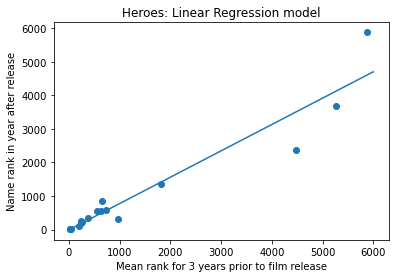

In [183]:
# Plot scattergraph and linear equation of the fitted model
import matplotlib.pyplot as plt
plt.scatter(arr_x,arr_y)
a = model.coef_
b= model.intercept_
x = np.linspace(0,6000,1000)
y = a*x+b
plt.plot(x, y)
plt.xlabel('Mean rank for 3 years prior to film release')
plt.ylabel('Name rank in year after release')
plt.title('Heroes: Linear Regression model')
plt.show()

## Making Rank Predictions for 2021

In [212]:
#THIS CODE IS COPIED FROM THE 'Key Statistics and SQL Connection' NOTEBOOK SO THAT DATA CAN BE ACCESSED IN THIS FILE
girls_rank_df = pd.read_csv('../data/girls_rank_clean.csv', index_col=[0])
boys_rank_df = pd.read_csv('../data/boys_rank_clean.csv', index_col=[0])
girls_rank_df_t = girls_rank_df.transpose()
girls_rank_df_t.columns = girls_rank_df_t.iloc[0]
girls_rank_df_t.drop(girls_rank_df_t.head(1).index,inplace=True)
boys_rank_df_t = boys_rank_df.transpose()
boys_rank_df_t.columns = boys_rank_df_t.iloc[0]
boys_rank_df_t.drop(boys_rank_df_t.head(1).index,inplace=True)

### 'Laurel' from Onward (2020)

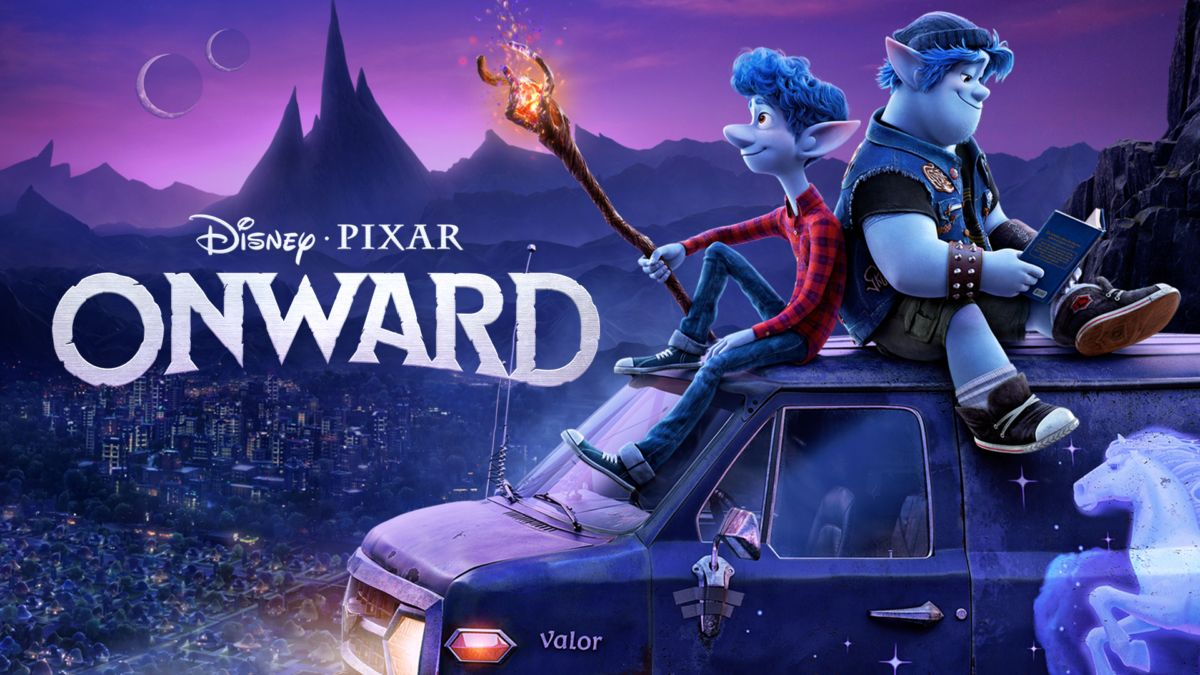

In [203]:
from IPython.display import Image
Image("../data/onward.jpeg", width=500)



In [215]:
#Show ranks for last 3 years for 'Laurel'
girls_rank_df_t['LAUREL'][0:3]

2020 Rank    1507.0
2019 Rank    1292.0
2018 Rank    1526.0
Name: LAUREL, dtype: object

In [217]:
#Calculate average of 2018 - 2020 ranks for 'Laurel'
np.mean(girls_rank_df_t['LAUREL'][0:3])

1441.6666666666667

We will now use our linear model to predict the 2021 baby name rank for 'Laurel' based on a 3 year average rank of 1441.67:

In [216]:
laurel_rank_avg = np.mean(girls_rank_df_t['LAUREL'][0:3])
pred_2021 = np.array([laurel_rank_avg]).reshape((-1, 1))
ans = model.predict(pred_2021).tolist()
print("Predicted 2021 rank for Laurel:",ans)

Predicted 2021 rank for Laurel: [1121.4220970193771]


This says that, given Laurel is a hero in the film, the rank will increase from 1507 (2020 rank) up to 1121 in 2021.

### 'Eleanor' from Godmothered (2020)

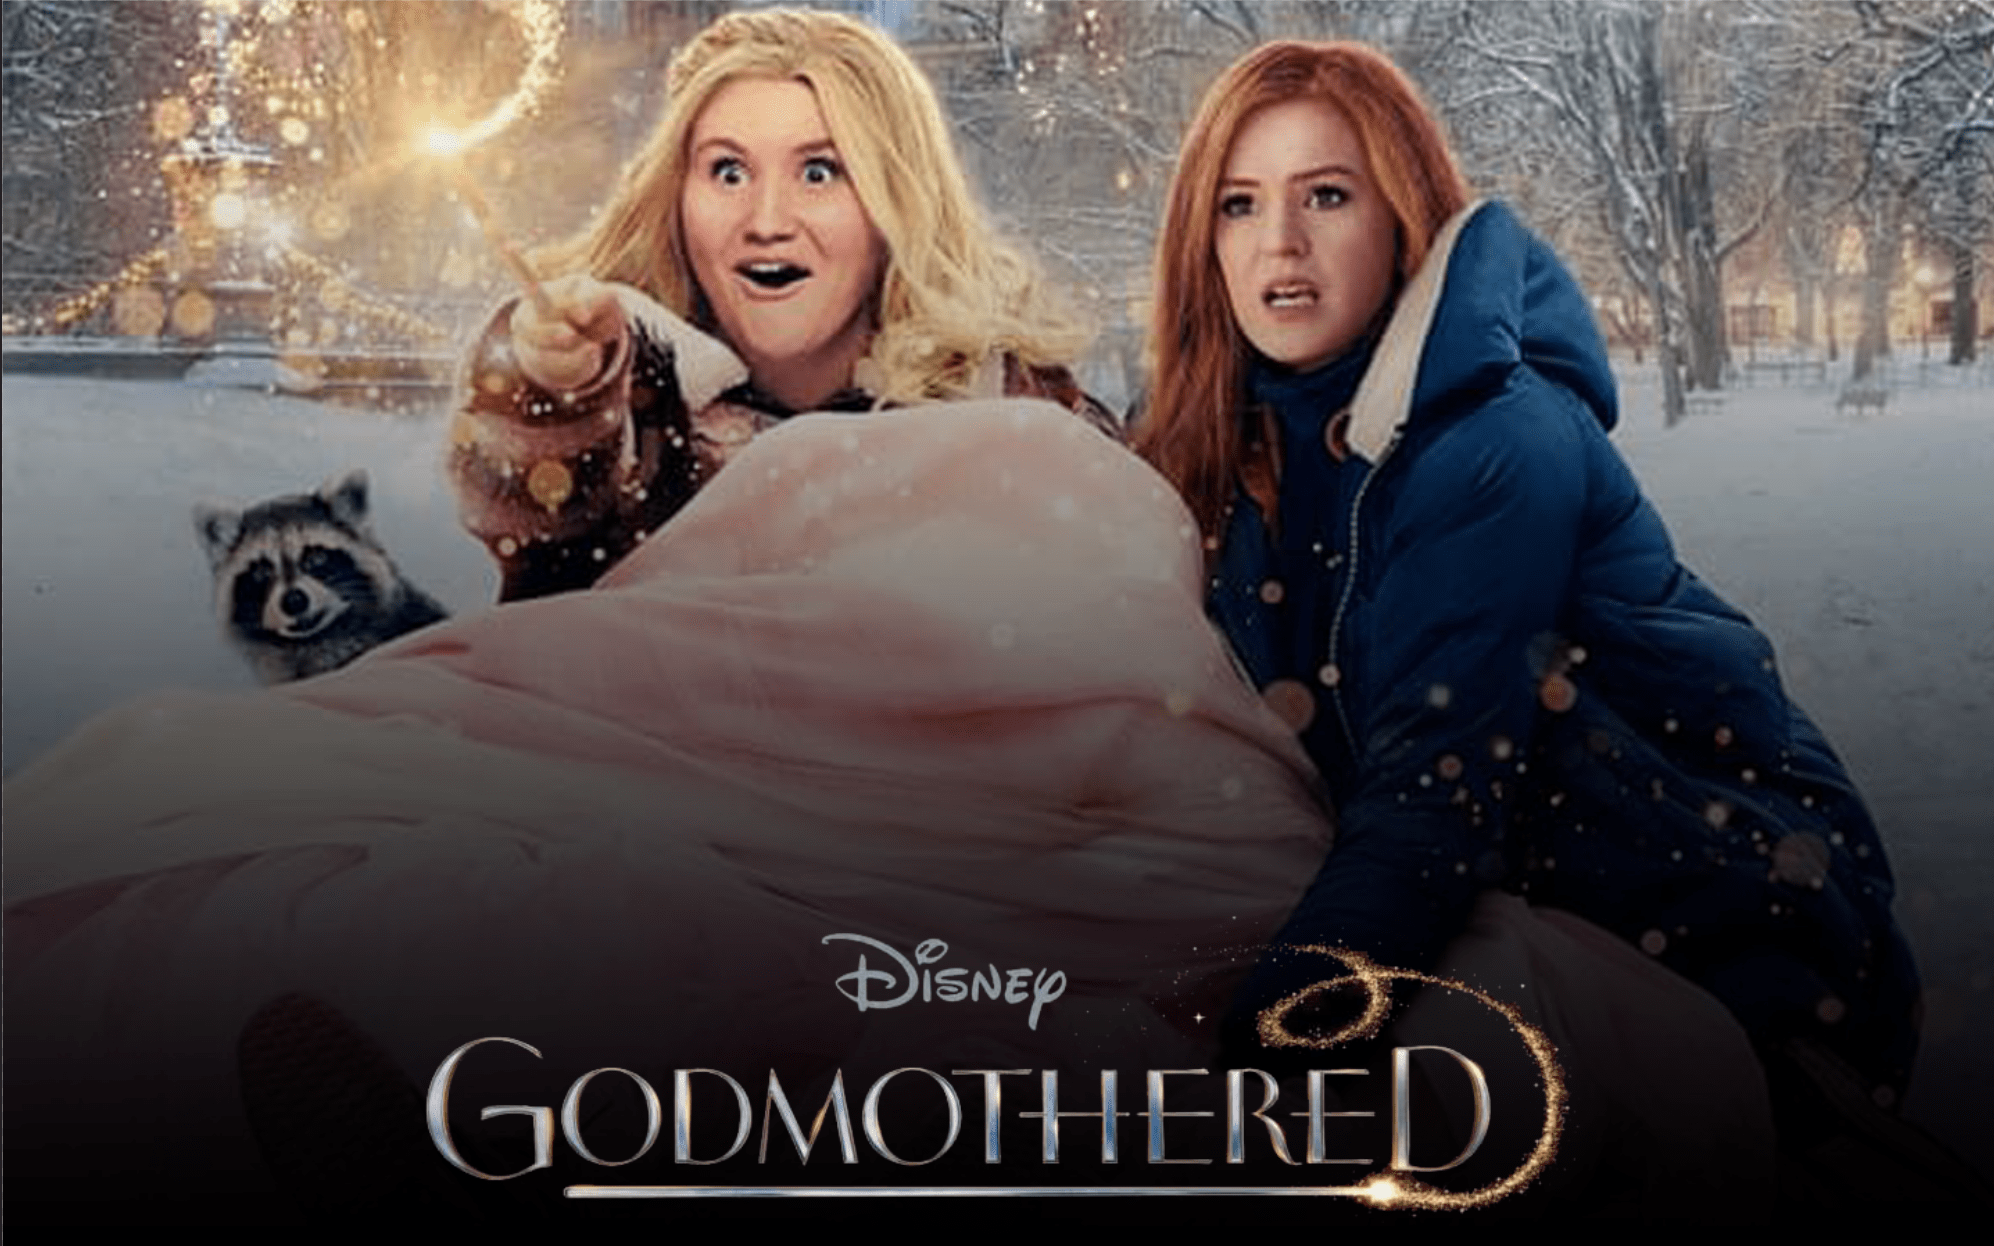

In [205]:
Image("../data/godmothered.png", width=500)

In [221]:
#Show ranks for last 3 years for 'Eleanor'
girls_rank_df_t['ELEANOR'][0:3]

2020 Rank    53.0
2019 Rank    52.0
2018 Rank    51.0
Name: ELEANOR, dtype: object

In [218]:
#Calculate average of 2018 - 2020 ranks for 'Eleanor'
np.mean(girls_rank_df_t['ELEANOR'][0:3])

52.0

In [219]:
eleanor_rank_avg = np.mean(girls_rank_df_t['ELEANOR'][0:3])
pred_2021 = np.array([eleanor_rank_avg]).reshape((-1, 1))
ans = model.predict(pred_2021).tolist()
print("Predicted 2021 rank for Eleanor:",ans)

Predicted 2021 rank for Eleanor: [30.69586631522872]


### 'Timothy' from The Willoughbys 2020

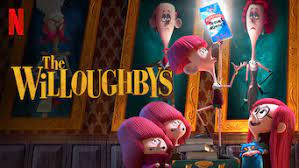

In [209]:
Image("../data/thewilloughbys.png", width=500)

In [222]:
#Show ranks for last 3 years for 'Timothy'
boys_rank_df_t['TIMOTHY'][0:3]

2020 Rank    388.0
2019 Rank    336.0
2018 Rank    383.0
Name: TIMOTHY, dtype: object

In [220]:
#Calculate average of 2018 - 2020 ranks for 'Timothy'
np.mean(boys_rank_df_t['TIMOTHY'][0:3])

369.0

In [223]:
timothy_rank_avg = np.mean(boys_rank_df_t['TIMOTHY'][0:3])
pred_2021 = np.array([timothy_rank_avg]).reshape((-1, 1))
ans = model.predict(pred_2021).tolist()
print("Predicted 2021 rank for Timothy:",ans)

Predicted 2021 rank for Timothy: [279.50388871859764]


### Villains Linear Regression Model

In [192]:
x2 = villains_rank_stats['Mean rank 3 years before release'].tolist()
y2= villains_rank_stats['Rank in year after release'].tolist()

arr_x2= np.array(x2).reshape((-1,1))
arr_y2 = np.array(y2)
model2 = LinearRegression().fit(arr_x2,arr_y2)
r_sq2 = model2.score(arr_x2,arr_y2)
print("coeff of determination: ", r_sq2) 
print('slope/gradient(a):', model2.coef_)
print('y-intercept(b):', model2.intercept_)

coeff of determination:  0.6612831223964875
slope/gradient(a): [0.96759458]
y-intercept(b): 229.69714368679843


The coeff of determination (R squared) shows that 66% of the data fits the linear regression model. This is good and means it can be used to make some predictions for future ranks of baby names, however, they are less reliable than the heroes linear model.

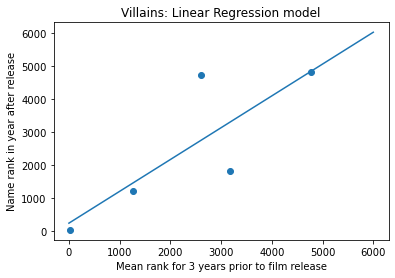

In [193]:
# Plot scattergraph and linear equation of the fitted model
import matplotlib.pyplot as plt
plt.scatter(arr_x2,arr_y2)
a = model2.coef_
b= model2.intercept_
x_villain = np.linspace(0,6000,1000)
y_villain = a*x+b
plt.plot(x_villain, y_villain)
plt.xlabel('Mean rank for 3 years prior to film release')
plt.ylabel('Name rank in year after release')
plt.title('Villains: Linear Regression model')
plt.show()

In [224]:
#Show ranks for last 3 years for 'Maxwell'
boys_rank_df_t['MAXWELL'][0:3]

2020 Rank    157.0
2019 Rank    155.0
2018 Rank    142.0
Name: MAXWELL, dtype: object

In [225]:
#Calculate average of 2018 - 2020 ranks for 'Maxwell'
np.mean(boys_rank_df_t['MAXWELL'][0:3])

151.33333333333334

In [226]:
maxwell_rank = np.mean(boys_rank_df_t['MAXWELL'][0:3])
pred_2021 = np.array([maxwell_rank]).reshape((-1, 1))
ans = model2.predict(pred_2021).tolist()
print("Predicted 2021 rank for Maxwell:",ans)

Predicted 2021 rank for Maxwell: [376.1264570728321]


Note that the rank has decreased since we have entered 'Maxwell' into the Villain linear model - this follows the general trend that villains tend to have declining names, or a movie influences the name to decline.